Importing the necessary libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

Loading image to be tested

In [2]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

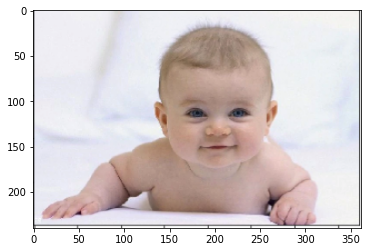

In [3]:
test_image = cv2.imread('/content/baby1.png')
plt.imshow(convertToRGB(test_image))

Converting to grayscale as opencv expects detector takes in input gray scale images

In [4]:
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

Displaying grayscale image

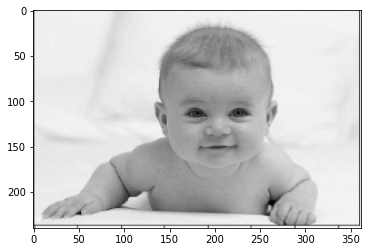

In [5]:
plt.imshow(test_image_gray, cmap='gray')

##Haar cascade files

Loading the classifier for frontal face

In [6]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_alt2.xml')

Face detection

In [7]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [8]:
faces = face_cascade.detectMultiScale(test_image_gray, 1.3, 5)
for (x,y,w,h) in faces:
    test_image = cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = test_image_gray[y:y+h, x:x+w]
    roi_color = test_image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

Final output image

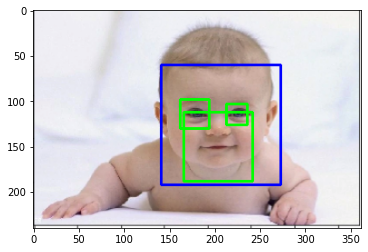

In [9]:
plt.imshow(convertToRGB(test_image))